# Final Project Report for CS350 - Operating Systems

<br>**Authors** <br> 
Egemen İşcan, S018748, egemen.iscan@ozu.edu.tr<br>
Barış Karaer, S015497, baris.karaer@ozu.edu.tr<br>
Ertan Ayanlar, S014576, ertan.ayanlar@ozu.edu.tr<br>

## Table of Contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis and Visualization](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

In this notebook we will be trying to achieve multiple goals, all of which are related to the subject of **file management with Python**. Our main task is to determine if the following assumptions are either true or false:

* 90% of the files in a specified directory are smaller than 100KB.
* 80% of the disk/SSD space is occuppied by files whose size are greater than 100MB.

While doing this we will also try to separate the files into two groups based on their size and then move the large files to the *Hard Disk Drive* (HDD) meanwhile keeping the smaller files in the *Solid State Drive* (SSD). The reasoning for each decision made on the road may be found in the explanations.

## Data <a name="data"></a>

### Data Source and Use Case

No external data source is needed for this project. All of the required data is already found in any computer device, given that it's able to run programs written in Python3. Diversity between different file extensions is of no concern in our case because it doesn't affect the ability to access the size of a specific file. As long as the target directories are accessible, this code may be modified in a such a way that it works on a cloud setting or virtual machine rather than a local environment. The program should also function in different operating systems. The necessary properties are '*file name*' and '*file size*'. After accessing the files, we will create a dataset to store this information, so that we can do our calculations more easily afterwards.

### Accessing and Storing Files 

Let's import the following libraries before getting started. NumPy and Pandas are arguably two of the most frequently used libraries in data science. They were extremely helpful since they provide easy-to-use solutions to numerous problems that we have encountered.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

First we have to define a function called *compareSize()* which will take in as a parameter the size of a single file (in Bytes) and return a number between 0 and 7 that represents the intervals '<1K', '<10K', '<100K', '<1M', '<10M', '<100M', '<1GB', '>=1GB', respectively. This function will be helpful when plotting the graphs that we have mentioned in the Introduction part. We tried to keep the function definition as brief as possible so we followed a slightly unusual approach for categorizing files according to their sizes. Here is roughly how it works; if the size of the file is equal to 0, then the function returns 0. If not, then it makes use of the logarithm function for fitting the size into one of these intervals since every value in these intervals may be expressed in powers of 10.

In [2]:
import math

def compareSize(sizeB):
    if(sizeB == 0):
        return 0
    else:
        return min(7, max(0, int(math.log10(sizeB))-2))

If you prefer to use a different address instead of using your entire SSD or HDD drives, you can modify these assignments by specifying new addresses for the variables '*ssd_drive*' and '*hdd_drive*'. If you leave the variables as they are, all of the files on your desktop (including the files inside the folders) will be stored in a dataframe and most of them may be repositioned to the HDD. This is just an outline to show how moving a file from one directory to the other works. Because of this, it's perfectly fine to use a part of your SSD/HDD drive instead of using the whole contents. 

In [3]:
ssd_drive = "C:\\"
hdd_drive = "D:\\"

In order to recursively traverse the subdirectories in a top-down fashion, the code will make use of the *os.walk()* method. Three separate lists are created and populated with the necessary data as they represent the features of the dataframe. After appending the necessary information to these variables, if the size of the file is bigger than 1GB and if there is enough space in the HDD drive to store this file, then the file is moved to HDD. As you may have noticed, this second section is commented out in the code to prevent the people who run this notebook from involuntarily moving large chunks of their files to HDD.  

In [4]:
import os
import shutil

files = []
sizes = []
size_categories = []

filenotfound = 0
oserror = 0

print("\nAccessing files...")

for root, dir, file in os.walk(ssd_drive):
    for i in file:
        try:
            newfile = os.path.join(root, i)
            size = os.path.getsize(str(newfile))
            files.append(newfile.strip())
            sizes.append(float(size))
            size_categories.append(compareSize(size))
        except FileNotFoundError as err:
            filenotfound = filenotfound + 1
        except OSError as err:
            oserror = oserror + 1
        
"""
        # ATTENTION! RUNNING THIS CODE MAY ALTER THE LOCATION OF YOUR FILES!
        
        size_megabytes = size / 1000000
        if (size_megabytes > 1000) :
            if newfile.startswith(hdd_drive):
                continue
            total, used, free = shutil.disk_usage(hdd_drive)
            if size_megabytes > free * 1000000:
                print(f"{newfile} {size} B - Not enough space on HDD !")
                continue
            file_path = newfile.replace(ssd_drive, hdd_drive, 1)
            file_dir = root.replace(ssd_drive, hdd_drive, 1)
            if not os.path.exists(file_dir):
                os.makedirs(file_dir)
            
            if os.path.islink(newfile):
                if os.path.lexists(file_path):
                    os.unlink(file_path)
                linkto = os.readlink(newfile)
                os.symlink(linkto, file_path)
            else:
                shutil.move(newfile,file_path)
    
"""
    
print("\nDone!")


Accessing files...

Done!


Now that we have obtained and stored the necessary data without any issues, it's time to create a dataframe from the previously created lists using the Pandas library. A major part of Data Science is data cleaning, so we are going to check if there are any missing values and make sure that our dataframe is ready to be worked on.

In [5]:
df = pd.DataFrame({
        'file_name':files,
        'file_size':sizes,
        'size_category':size_categories
        })

df = df.sort_values(by=['file_size'])

print("There are {} rows and {} columns in the initial dataset.".format(df.shape[0],df.shape[1]))

na_cols = df.columns[df.isna().any()].tolist()

if not na_cols:
    print("No missing values.")
else:
    print(f"Columns which include NA rows: {na_cols}.") 

There are 1227699 rows and 3 columns in the initial dataset.
No missing values.


The last 10 rows of the dataframe can be seen below. The indexes are shuffled (unordered) because we sorted the files according to their file size in the last cell. By looking at this table, we can see the directory and size of the files. We can also see a third column which tells us how large the size is.

In [6]:
df.tail(10)

,file_name,file_size,size_category
713148,C:\Users\hp\Desktop\Proffesional\bilgisayar pr...,3.587150e+09,7
717474,C:\Users\hp\Downloads\kali-linux-2018.4-vbox-a...,3.763980e+09,7
723442,C:\Users\hp\Music\iTunes\iTunes Media\Download...,4.362269e+09,7
723445,C:\Users\hp\Music\iTunes\iTunes Media\Movies\R...,4.811422e+09,7
1,C:\pagefile.sys,4.831838e+09,7
723444,C:\Users\hp\Music\iTunes\iTunes Media\Movies\B...,5.214800e+09,7
730490,C:\Users\hp\VirtualBox VMs\Ubuntu OS\Ubuntu OS...,6.190793e+09,7
717925,C:\Users\hp\Downloads\Xilinx_ISE_DS_Win_14.7_1...,6.632274e+09,7
730482,C:\Users\hp\VirtualBox VMs\UB2_Coursera\UB2_Co...,1.027395e+10,7
717234,C:\Users\hp\Downloads\dfdc_train_part_00.zip,1.237124e+10,7


By using the '*describe()*' method, we may also display some key facts about the file_size attribute. This is a good way of searching for any major errors in the data that should be fixed. You may want to take a second look at the code in case you notice any anomalies below. One example would be a minimum value which is bigger than 10TB, since a value like this indicates an unusual situation and most probably that something went wrong in the previous parts.

In [7]:
df.file_size.describe()

count    1.227699e+06
mean     2.253990e+05
std      2.092102e+07
min      0.000000e+00
25%      7.710000e+02
50%      3.500000e+03
75%      1.689600e+04
max      1.237124e+10
Name: file_size, dtype: float64


## Methodology <a name="methodology"></a>

We will try to find an answer to the hypotheses described in the Introduction section by using some statistical tools that Python provides us. Until this step, we have already gathered the necessary data which is composed of SSD files by using the os library. Now that the data is stored in an organized fashion thanks to Pandas, it's time to start modifying the dataframe and do the appropriate calculations, none of which are complicated, so that we can make decisions based on the information that we have.   


## Analysis and Visualization <a name="analysis"></a>

### Data Analysis

Although it may not be crucial, we will count the files and print their distribution based on the "size_category" attribute. This way it becomes easier to notice possible future mistakes as early as possible.

In [8]:
intervals = ['0K','1K','10K','100K','1M','10M','100M','1GB','∞']

counts = df.size_category.astype(pd.api.types.CategoricalDtype(categories=range(8), ordered=True))
counts = counts.value_counts().sort_index()
print("Distribution of File Size:\n")
for num, count in enumerate(counts):
    print("{} files with size {} - {}".format(str(count), intervals[num], intervals[num+1]))

Distribution of File Size:

357031 files with size 0K - 1K
450156 files with size 1K - 10K
314529 files with size 10K - 100K
83058 files with size 100K - 1M
20479 files with size 1M - 10M
2288 files with size 10M - 100M
132 files with size 100M - 1GB
26 files with size 1GB - ∞


At this point, we have enough information to check if the first hypothesis is either true or false. Later in the code, we will use visualization techniques that will enable us to confirm that our findings are indeed valid.

In [9]:
percentage = df[df['size_category'] < 3].shape[0] / df.shape[0]
hypothesis1 = percentage >= 0.9
print("{}% of the files in a specified directory are smaller than 100KB. \nTherefore the first hypotheses is {}.".format(
    str(round(percentage*100,2)), str(hypothesis1).lower()))

91.37% of the files in a specified directory are smaller than 100KB. 
Therefore the first hypotheses is true.


A list called *sizedist* and a second list called *sizedist_cumulative* (which is basically a cumulative sum of the items in the sizedist) are created in the following cell. Both of them will be used while plotting the **Probability Distribution Function (PDF)** and the **Cumulative Distribution Function (CDF)**. First we calculate the sum of the sizes for each category of file size and append these values to sizedist. Then we divide each item in the list by the sum of all of the files no matter what their cateogry is. When it comes to calculating the CDF, a Numpy function called '*cumsum()*' which is the abbreviation for "cumulative sum" is used on sizedist. In other words, we derived the CDF by using the same list that we used for obtaining the PDF. These functions indicate how likely it is for a single file with unknown size to belong to a certain interval.  

In [10]:
sizedist = []
for i in range(8):
    sizedist.append(df[df['size_category']==i]['file_size'].sum(axis=0, skipna=True))
sizedist = [x/sum(sizes) for x in sizedist]
sizedist_cumulative = np.cumsum(sizedist).tolist() 

In the cell below, the second hypothesis is checked by calculating the sum of the last two values in the sizedist variable. These two values represent the ratio of the file size of the files larger than 100MB to the total space occupied by files in SSD. 

In [11]:
print(str(round(sum(sizedist[-2:]*100),2)) + "% of the disk space is occupied by files whose size are greater than 100MB.")
hypothesis2 = sum(sizedist[-2:]) >= 0.8
print("Therefore the second hypotheses is {}.".format(str(hypothesis2).lower()))

43.55% of the disk space is occupied by files whose size are greater than 100MB.
Therefore the second hypotheses is false.


### Data Visualization

We have already answered the hypotheses, however it's good practice to always use graphs to see if the values that we found are actually correct. The matplotlib library will be used for plotting the density graphs. Let's plot the PDF and CDF graphs for the file size. 

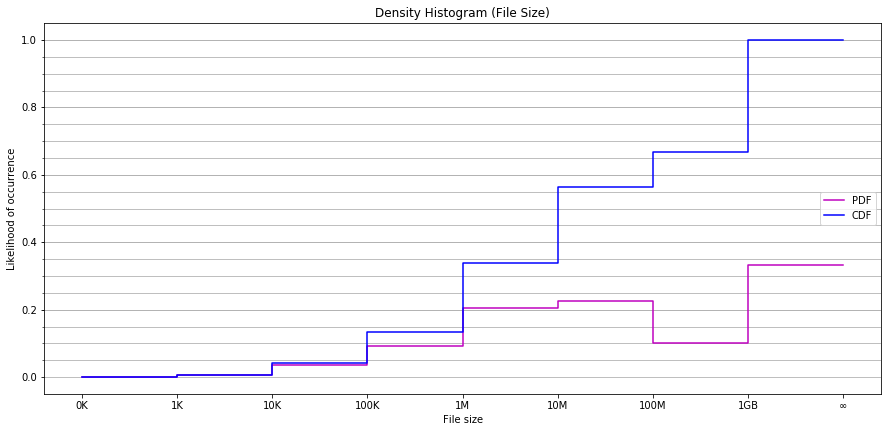

In [12]:
sizedist.append(sizedist[-1])
sizedist_cumulative.append(sizedist_cumulative[-1])
intervals.insert(0,"")
fbins = np.arange(9)
fig_size = plt.figure(figsize=(15,15))
ax1 = fig_size.add_subplot(211)
ax1.step(fbins, sizedist, where='post', color='m', label='PDF')
ax1.step(fbins, sizedist_cumulative, where='post', color='b', label='CDF')
ax1.yaxis.grid(True, which='both')
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.legend(loc='right')
ax1.set_xticklabels(intervals)
ax1.set_title('Density Histogram (File Size)')
ax1.set_xlabel('File size')
ax1.set_ylabel('Likelihood of occurrence')
fig_size.set_visible(True)

At this point, more or less the same thing will be done in terms of plotting PDF and CDF graphs but this time not for the file size but for the file count instead. The distrubtion is determined based on the number of files in an interval. Since the values on the y-axis represent a probability, they would never exceed 1. In fact, their sum is going to be always equal to exactly 1, as it is the case with both of these graphs.  

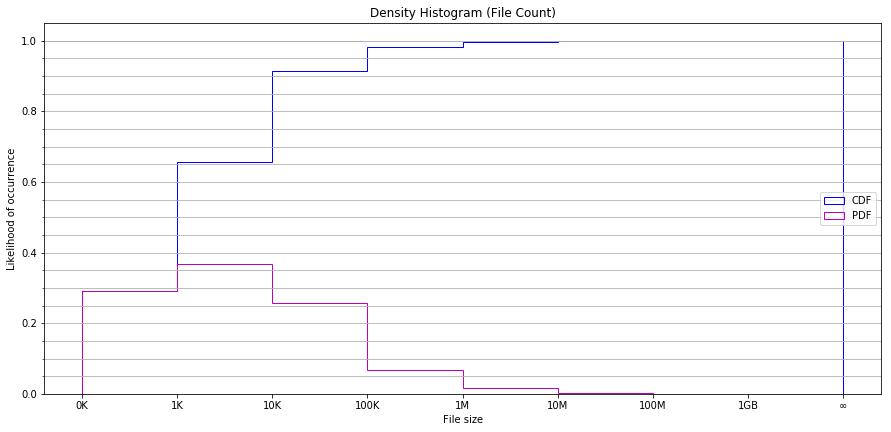

In [13]:
fig_count = plt.figure(figsize=(15,15))
ax2 = fig_count.add_subplot(211)
ax2.hist(df['size_category'], fbins, density=1, histtype='step', cumulative=True, label='CDF', color='b')
ax2.hist(df['size_category'], fbins, histtype='step', density=1, label='PDF', color='m')
ax2.yaxis.grid(True, which='both')
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.legend(loc='right')
ax2.set_xticklabels(intervals)
ax2.set_title('Density Histogram (File Count)')
ax2.set_xlabel('File size')
ax2.set_ylabel('Likelihood of occurrence')
fig_count.set_visible(True)

## Results and Discussion <a name="results"></a>

While evaluating the results, please keep in mind that these results that we found may vary from the outputs that you see when you run this code on your own device because the number of files and their size may differ from the ones that we used for this report. With that in mind, it is possible to state the first hypothesis is true whereas the second one is false. By looking both at the histograms and the results that we have obtained manually, we found out that:

* 91.37% of the files in a specified directory are smaller than 100KB. 
* 43.55% of the disk space is occupied by files whose size are greater than 100MB.

Clearly, the second percentage is different than 80%. However, the first percentage was just a little over 90%. There seems to be a temptation for the files in a computer to gather around an interval, in our case this was 1KB-10KB, as we may conclude from the second graph. Of course, this is not a strong claim because there are many factors which may affect this situation, as we have stated at the beginning of this section.    


## Conclusion <a name="conclusion"></a>

The aim of this project was to demonstrate how to access files in a specified directory, store them in a Pandas dataframe, use Numpy functionalities to extract meaningful information and answer hypotheses this way. One of the libraries that's also used is the matplotlib library while visualizing this data via histograms/step plots. It is important to keep in mind that File Management is a broad subject and this notebook covers only a part of it. The notebook serves as a documentation of the steps that we have followed as a team during the course of finding solutions to a programming problem which is provided to us in the context of our CS350 Operating Systems course at Ozyegin University. Lastly, we would like to express our gratitude to our professor Dr. İsmail Arı whose direction and guidance helped us in writing this report.